# **A. The $\beta$-method for a scalar IVP**

In [ ]:
# import all the packages here

import numpy as np
import matplotlib.pyplot as plt

import warnings


In [ ]:
# Performs integration for the linear IVP given by
#           d/dt u = lambda * u + g(t), u(t_0) = u_0
# using the beta-method
#
# INPUT
# lambda        constant defining the rhs
# g             function defining time-depdendent part of rhs
# tRange        the time interval [t_0, T] of integration
# u0            initial solution at t = tRange(1) (N x 1 array)
# beta          defines the method
# h             the step-size
#
# OUTPUT
# tArray        array containing the time points
# solArray      array containing the solution at each time point
#               (the ith row equals the solution at time tArray(i))

def LinearBetaMethod(Lambda, g, tRange, u0, beta, h):
    # initialize your output based on the number of time steps and on the size
    # of your initial condition; save also the initial condition in the first
    # row of your solArray

    # main loop: separate the cases for explicit and implicit Euler methods
    # you will need a predefined identity matrix for the implicit case


    ampFactor = ( 1 + (1 - beta)*h*Lambda ) / ( 1 - beta*h*Lambda )

    nLim = int( ( tRange[1] - tRange[0] ) / h )
    tArray = [tRange[0] + h*(n+beta) for n in range(nLim+1)]
    solArray = [u0]


    for n in range(nLim):
        uNext = ampFactor*solArray[-1] + ( h*g(tArray[n]) ) / ( 1 - beta*h*Lambda )

        solArray.append(uNext)

    return tArray, solArray


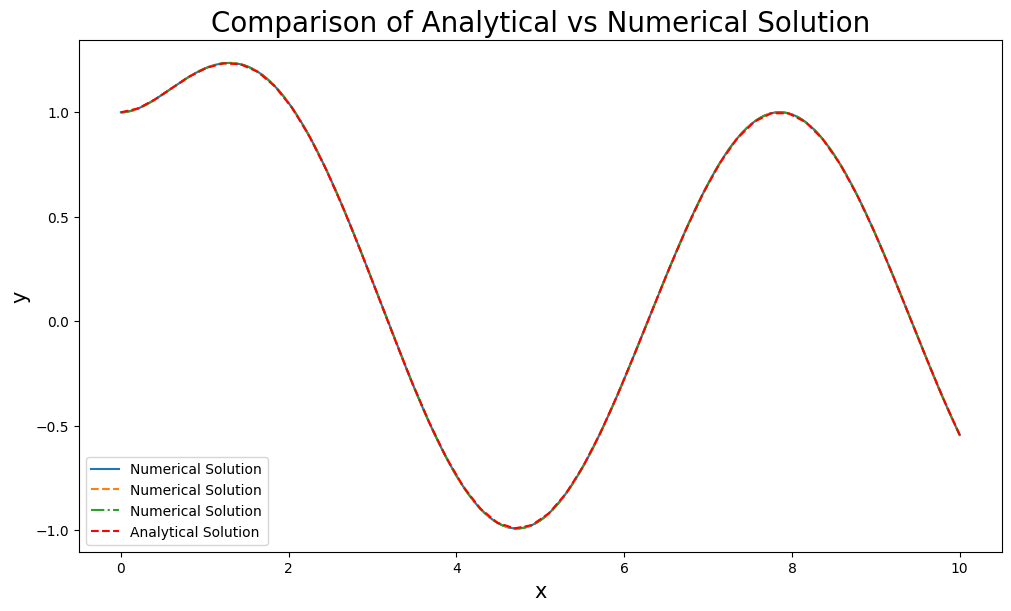

In [ ]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)

Lambda = -1

x = np.linspace(0,10,50)
analSol = lambda t: np.exp(Lambda*t) + np.sin(t)
y = analSol(x)


g = lambda t: np.cos(t) - Lambda*np.sin(t)

style = ['-','--','-.']
bVals = [0.0, 0.5, 1.0]

for i in range(3):
    numSol = LinearBetaMethod(Lambda, g, tRange=[0,10], u0=1.0, beta=bVals[i], h=0.0001)

    plt.plot(*numSol, label='Numerical Solution', linestyle=style[i])

plt.plot(x,y, linestyle='dashed', c='r', label='Analytical Solution')


plt.title('Comparison of Analytical vs Numerical Solution', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend()

plt.show()

In [ ]:
tRange = [0,10]
h=1
nLim = int( ( tRange[1] - tRange[0] ) / h )
tArray = [tRange[0] + h for n in range(nLim+1)]
[print(x) for x in tArray]

1
1
1
1
1
1
1
1
1
1
1


[None, None, None, None, None, None, None, None, None, None, None]

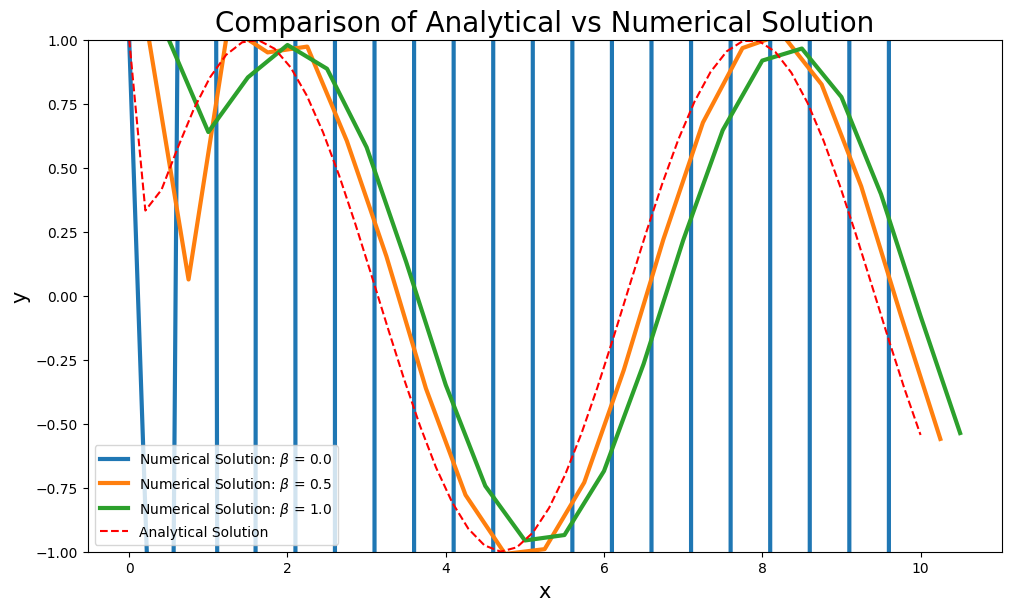

In [ ]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)

Lambda = -10

x = np.linspace(0,10,50)
analSol = lambda t: np.exp(Lambda*t) + np.sin(t)
y = analSol(x)


g = lambda t: np.cos(t) - Lambda*np.sin(t)

for b in [0.0, 0.5, 1.0]:
    numSol = LinearBetaMethod(Lambda, g, tRange=[0,10], u0=1.0, beta=b, h=0.5)

    plt.plot(*numSol, label=f'Numerical Solution: $ \\beta $ = {b}', linewidth=3)

plt.plot(x,y, linestyle='dashed', c='r', label='Analytical Solution')

plt.ylim(-1,1)
plt.title('Comparison of Analytical vs Numerical Solution', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend()

plt.show()

Beta = 0 but different h values {0.19, 0.2, 0.21}

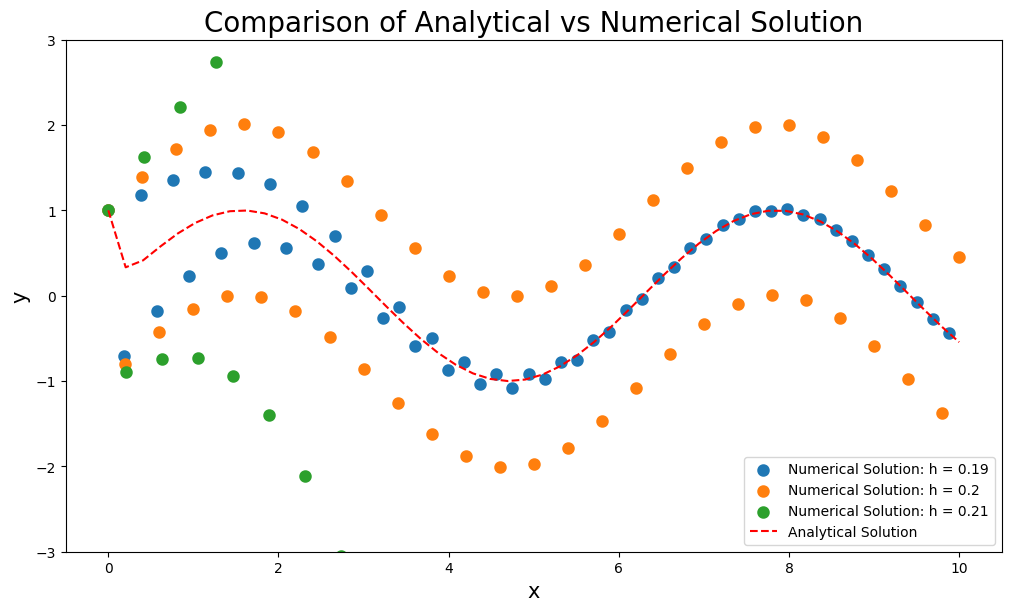

In [ ]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)

Lambda = -10

x = np.linspace(0,10,50)
analSol = lambda t: np.exp(Lambda*t) + np.sin(t)
y = analSol(x)


g = lambda t: np.cos(t) - Lambda*np.sin(t)

for h in [0.19, 0.2, 0.21]:
    numSol = LinearBetaMethod(Lambda, g, tRange=[0,10], u0=1.0, beta=0.0, h= h)

    plt.scatter(*numSol, label=f'Numerical Solution: h = {h}', linewidth=3)

plt.plot(x,y, linestyle='dashed', c='r', label='Analytical Solution')

plt.ylim(-3,3)
plt.title('Comparison of Analytical vs Numerical Solution', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend()

plt.show()

# Discussion question A.1.a:
From the tutorials we have that for $β=0$ the following time step constraint must be satisfied for asymptotic stability: $h<-\frac{2}{λ}$

For this specfic case we are using $λ=-10$, thus we get the following bound $h < 0.2$ which is not satisfied as we take $h=0.5$. From the plot we can see that the method does not converge for this specific value of $β$

For the other values of $β$, $β=\frac{1}{2}$ and $β=1$ as shown in the tutorials we get that the $β$-method is asymptotically stable for every value of $h > 0$ for $β≥\frac{1}{2}$

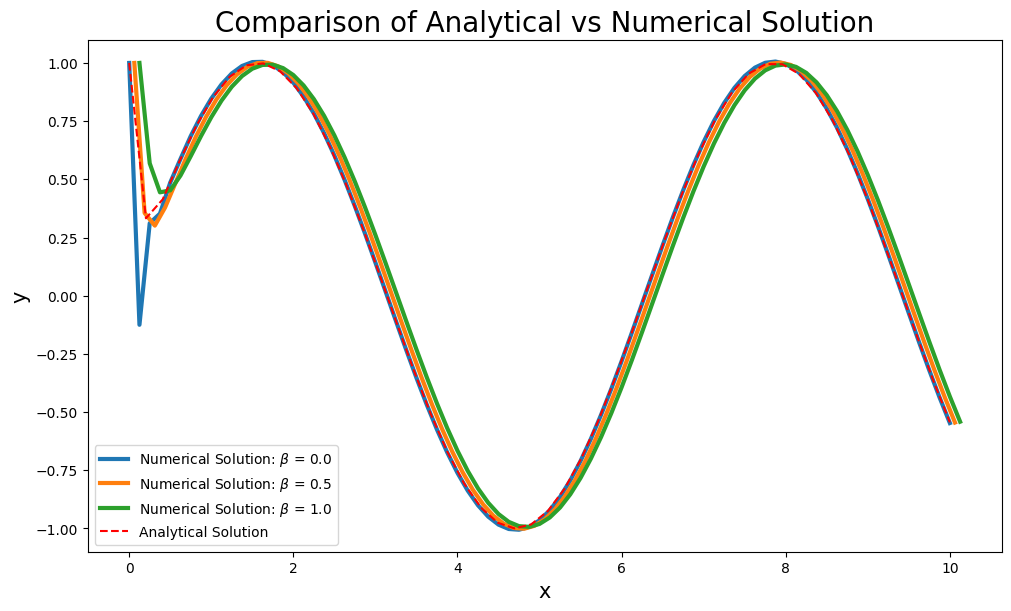

In [ ]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)

Lambda = -10

x = np.linspace(0,10,50)
analSol = lambda t: np.exp(Lambda*t) + np.sin(t)
y = analSol(x)


g = lambda t: np.cos(t) - Lambda*np.sin(t)

for b in [0.0, 0.5, 1.0]:
    numSol = LinearBetaMethod(Lambda, g, tRange=[0,10], u0=1.0, beta=b, h=0.125)

    plt.plot(*numSol, label=f'Numerical Solution: $ \\beta $ = {b}', linewidth=3)

plt.plot(x,y, linestyle='dashed', c='r', label='Analytical Solution')

plt.ylim(-1.1,1.1)
plt.title('Comparison of Analytical vs Numerical Solution', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend()

plt.show()

# Discussion question A.1.b:
From the tutorials we have that for $β=0$ the following time step constraint must be satisfied for asymptotic stability: $h<-\frac{2}{λ}$

For this specfic case we are using $λ=-10$, thus we get the following bound $h < 0.2$ which is satisfied as we take $h=0.125$. From the plot we can see that the method converges for this specific value of $β$.

For the other values of $β$, $β=\frac{1}{2}$ and $β=1$ as shown in the tutorials we get that the $β$-method is asymptotically stable for every value of $h > 0$ for $β≥\frac{1}{2}$ and so in this case it does converge as well as in the previous case when $h=0.5$.

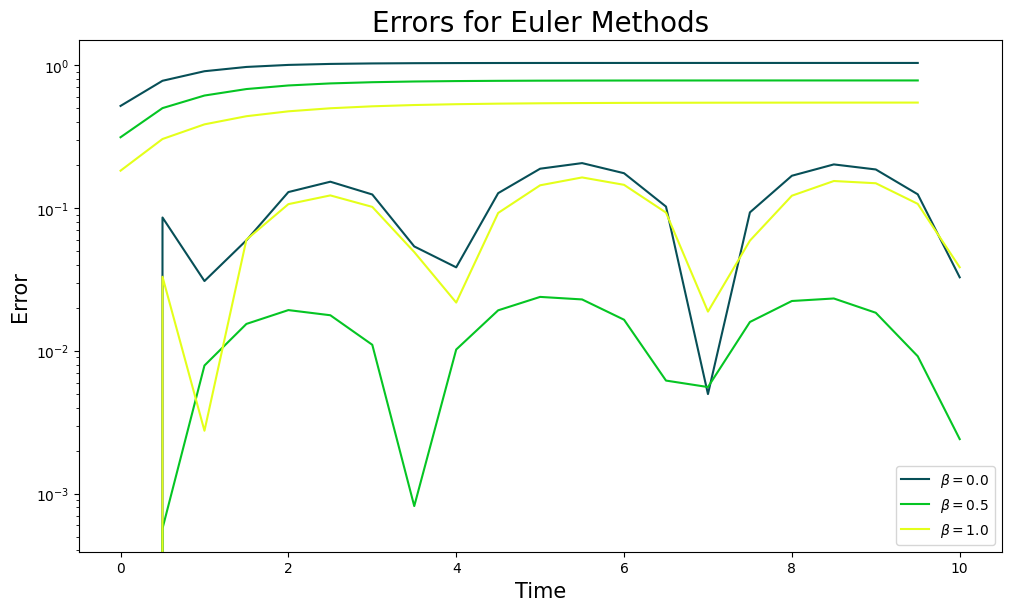

In [ ]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)

Lambda = -1.0
h = 0.5
tRange = [0, 10]
beta = 0.5

f = lambda t,y: Lambda*y + g(t)

colors = ['red', 'blue', 'green']
colors = ['#074F57', '#05C523', '#E4FF1A']
colours = ['#F71735', '#05C523', '#074F57']
colors = ['green','blue', 'red']

m = 0
for beta in [0.0, 0.5, 1.0]:
    ampFactor = ( 1 + (1 - beta)*h*Lambda ) / ( 1 - beta*h*Lambda )


    nLim = int( ( tRange[1] - tRange[0] ) / h )
    tn = np.array([tRange[0] + n*h for n in range(nLim+1)])
    yn = analSol(tn)


    tBeta = np.array(LinearBetaMethod(Lambda, g, tRange=tRange, u0=1.0, beta=beta, h=h)[0])
    approxSols = np.array(LinearBetaMethod(Lambda, g, tRange=tRange, u0=1.0, beta=beta, h=h)[1])

    numError = abs(yn - approxSols)

    plt.semilogy(tn, numError, c=colors[m])


    uStar = []


    for i in range(len(yn)-1):
        un = yn[i] + h*f(tn[i], yn[i]*(1-beta) + beta*yn[i+1])

        uStar.append(un)

    tau = yn[:len(uStar)] - uStar
    tauMax = max(tau)

    errorBound = []
    for n in range(len(yn)-1):
        val = ( tauMax / abs(1-beta*h*Lambda) ) * ( ( 1 - abs(ampFactor)**(n+1) ) / ( 1-abs(ampFactor) ) )

        errorBound.append(val)

    plt.semilogy(tn[:len(errorBound)], errorBound, label=f'$ \\beta = {beta}$', c=colors[m])

    m += 1


plt.title('Errors for Euler Methods', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.legend()

plt.show()


# Discussion question A.2:

a)  The value of $β$ that leads to the smallest error is $β=\frac{1}{2}$ as we can see from the graph above.

b)  The value of $β$ that makes the error decrease faster is $β=\frac{1}{2}$ as it has the biggest slope out of the three values of $β$.
The slopes of $β=0$ and $β=1$ are similar as they have the same bound for the truncation error. However we have that the bound for $β=\frac{1}{2}$ is different and involves $h^3$ which explains the bigger slope.



The slope of 0.0 is 0.9724213154657195
The slope of 0.5 is 1.9814776310725437
The slope of 1.0 is 1.0108240581194499


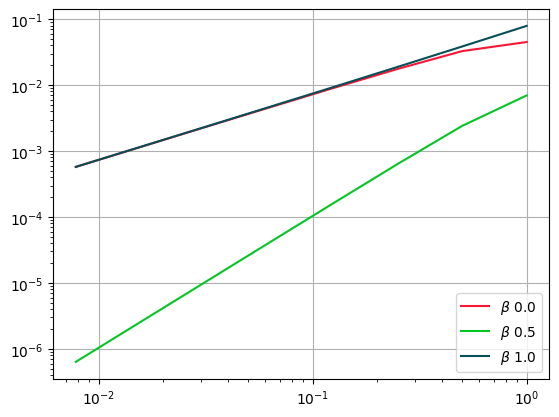

In [ ]:
hVals = [2**(-l) for l in range(8)]
colours = ['#F71735', '#05C523', '#074F57']
m= 0
for beta in [0.0, 0.5, 1.0]:
    numErrorVals=[]

    for h in hVals:
        yn = analSol(tRange[1])

        approxSols = np.array(LinearBetaMethod(Lambda, g, tRange=tRange, u0=1.0, beta=beta, h=h)[1][-1]) #[-1] so we only get the solutions corresponding to t=T

        numError = abs(yn - approxSols)
        numErrorVals.append(numError)
    plt.loglog(hVals, numErrorVals, label = f'$\\beta$ {beta}', c = colours[m])
    m+=1
    bet = [0.0, 0.5, 1.0]

    riseOverRun = ( np.log(numErrorVals[-1]/numErrorVals[1]) ) / ( np.log(hVals[-1] / hVals[1]) )
    print(f'The slope of {beta} is {riseOverRun}')



plt.grid()
plt.legend(loc ='lower right')
plt.show()

In [ ]:
## Discussion question A.2(b)

# the idea is completely analogous to the previous question, so you can reuse a
# lot of code

# set up the corrct values for h

# IMPORTANT: the output of this cell consists of a print out of the slopes
# and a single figure with the 3 error plots in a loglog scale


# Discussion question A.3:

we have that $β=0$ is an explicit method while both $β=\frac{1}{2}$ and $β=1$ are implicit method. Similarly, $β=0$ presents conditional stability while both $β=\frac{1}{2}$ and $β=1$ have unconditional stability.

From the previous results we have that $β=\frac{1}{2}$ is a more accurate method than the other two. However it is more costly to compute than $β=0$ because the latter is an explicit method and thus we do not need to find solutions of linear systems as in the other two methods.

### **B. The $\beta$-method for a system of IVP**

In [ ]:
def fpIterator(system, x0, tol=1e-12, maxit=50):
    x = np.array(x0)  # Initialize solution vector
    errEst = []  # Error estimates for each iteration
    xHist = []  # History of solutions

    success = False

    if tol != None:
        errorEstimate = tol + 1
        iteration = 0

        while errorEstimate > tol and iteration < maxit:
            prevSolution = x.copy()  # Store previous solution vector
            x = system(x)  # Compute new solution vector using the system function
            xHist.append(x)

            errorEstimate = np.linalg.norm(x - prevSolution)  # Compute error estimate using numpy.linalg.norm
            errEst.append(errorEstimate)

            iteration += 1

        if errorEstimate <= tol:
            success = True

    else:
        for iteration in range(maxit):
            prevSolution = x.copy()
            x = system(x)
            xHist.append(x)

            errorEstimate = np.linalg.norm(x - prevSolution)
            errEst.append(errorEstimate)

    return x, success, np.array(errEst), np.array(xHist)



def newton(f, df, x0, tol=10e-12, maxit=50):
    system = lambda x: x - np.linalg.inv(df(x)).dot(f(x))

    x, success, errEst, xHist = fpIterator(system, x0, tol, maxit)
    return x, success, errEst, xHist


In [ ]:
# Performs integration for the system of IVPs given by
#           d/dt u = f(t, u), u(t_0) = u_0
# using the beta-method
# INPUT
# f             the right-hand side function, the output should be a
#               N x 1 array where N is the number of unknowns
# tRange        the time interval [t_0, T] of integration
# u0            initial solution at t = tRange(1) (N x 1 array)
# df            a function that evaluates the Jacobian matrix of f
# beta          defines the method
# h             the step-size
#
# OUTPUT
# tArray        array containing the time points
# solArray      array containing the solution at each time point
#               (the ith row equals the solution at time tArray(i))

def BetaMethod(f, tRange, u0, df, beta, h):

    # initialize your output as for the linear version and set up th newton()
    # inputs

    # main loop: separate the cases for explicit and implicit Euler methods
    # you will need a predefined identity matrix for the implicit case

    # for the implicit method you will need to define F, DF and X0 for newton()

    # both F and DF have to be function handles
    #       F  = lambda x: ...
    #       DF = lambda x: ...

    # remember to raise error and break the loop if newton() does not converge
    # e.g.
    #
    # import warnings
    # if not success:
    #   warnings.warn('Newton method has failed after %d iterations (tolerance was %9.2e)\n' % (maxit, tol))
    #   break

# BetaMethod
# Performs integration for the system of IVPs given by
#           d/dt u = f(t, u), u(t_0) = u_0
# using the beta-method
# INPUT
# f             the right-hand side function, the output should be a
#               N x 1 array where N is the number of unknowns
# tRange        the time interval [t_0, T] of integration
# u0            initial solution at t = tRange(1) (N x 1 array)
# df            a function that evaluates the Jacobian matrix of f
# beta          defines the method
# h             the step-size
#
# OUTPUT
# tArray        array containing the time points
# solArray      array containing the solution at each time point
#               (the ith row equals the solution at time tArray(i))


    nLim = int( ( tRange[1] - tRange[0] ) / h )
    tArray = np.array([tRange[0] + h*n for n in range(nLim)])

    solArray = [u0]

    for t in tArray:
        un =  solArray[-1]
        F = lambda x: x - un[:len(x)] - h* np.array(f(t + beta*h, (1-beta)*un[:len(x)] + beta * x))
        Jac = lambda x: np.eye(len(u0)) - h*beta*df(t,x)
        uNewton, success = newton(F, Jac, un, tol, maxit)[:2]

        if success == False:
            print('Unsuccessful')
            return tArray[:len(solArray)], solArray
        else:
            solArray.append(uNewton)


    return tArray, solArray


In [ ]:
#testing the function for linear problem
tol = 1e-12
maxit = 50
Lambda = [-1, -1]
yTest = np.array([1, 1])
h = 0.001
beta = 0.5
tRange = np.array([0,10])

f = lambda t, c: np.array([Lambda[0]*c[0] - Lambda[0]*np.sin(t) + np.cos(t), Lambda[1]*c[1] - Lambda[1]*np.sin(t) + np.cos(t)] )
df = lambda t, c: np.array([[Lambda[0], 0.0],
                        [0.0, Lambda[1]]])

test = BetaMethod(f, tRange, yTest, df, beta, h)


print(test[1])

[array([1, 1]), array([1.0000005, 1.0000005]), array([1.000002, 1.000002]), array([1.00000449, 1.00000449]), array([1.00000798, 1.00000798]), array([1.00001246, 1.00001246]), array([1.00001793, 1.00001793]), array([1.00002439, 1.00002439]), array([1.00003183, 1.00003183]), array([1.00004026, 1.00004026]), array([1.00004967, 1.00004967]), array([1.00006006, 1.00006006]), array([1.00007142, 1.00007142]), array([1.00008377, 1.00008377]), array([1.00009709, 1.00009709]), array([1.00011138, 1.00011138]), array([1.00012664, 1.00012664]), array([1.00014287, 1.00014287]), array([1.00016006, 1.00016006]), array([1.00017822, 1.00017822]), array([1.00019734, 1.00019734]), array([1.00021742, 1.00021742]), array([1.00023846, 1.00023846]), array([1.00026046, 1.00026046]), array([1.0002834, 1.0002834]), array([1.00030731, 1.00030731]), array([1.00033216, 1.00033216]), array([1.00035796, 1.00035796]), array([1.00038471, 1.00038471]), array([1.0004124, 1.0004124]), array([1.00044103, 1.00044103]), arra

In [ ]:
Lambda = -1
tRange = [0,10]
u0 = 1.0
beta = 0.5
h = 0.001


testLinear = LinearBetaMethod(Lambda, g, tRange=tRange, u0=1.0, beta=beta, h=h)
print(testLinear[1])

[1.0, 1.0000004996251668, 1.0000019972511665, 1.0000044908794987, 1.0000079785126632, 1.0000124581541596, 1.0000179278084875, 1.0000243854811464, 1.000031829178636, 1.0000402569084563, 1.000049666679107, 1.0000600565000874, 1.0000714243818978, 1.000083768336038, 1.0000970863750078, 1.0001113765123073, 1.0001266367624366, 1.0001428651408961, 1.000160059664186, 1.000178218349807, 1.0001973392162595, 1.0002174202830447, 1.0002384595706635, 1.0002604551006171, 1.000283404895407, 1.000307306978535, 1.0003321593745034, 1.0003579601088142, 1.0003847072079703, 1.0004123986994746, 1.000441032611831, 1.0004706069745428, 1.0005011198181146, 1.000532569174051, 1.0005649530748573, 1.0005982695540394, 1.0006325166461036, 1.000667692386557, 1.0007037948119069, 1.0007408219596619, 1.0007787718683305, 1.000817642577423, 1.0008574321274495, 1.0008981385599214, 1.0009397599173508, 1.0009822942432511, 1.001025739582136, 1.0010700939795207, 1.001115355481921, 1.001161522136854, 1.001208591992838, 1.0012565

In [ ]:
tRange = [0,10]
nLim = int( ( tRange[1] - tRange[0] ) / h )
tArray = np.array([tRange[0] + h*n for n in range(nLim)])
l = np.array(test[1][:len(tArray)])
testYVals = l[0:len(l)+1 , 0]

plt.plot(tArray, testLinear[1][:len(tArray)], c = '#F71735', label = 'scalar solution')
plt.plot(tArray, testYVals, linestyle = '-.', c = '#074F57', label = 'coupled system solution')

plt.title('They are the same')
plt.legend(loc = 'lower right')
plt.show()

NameError: ignored

They are the same!!!!

In [ ]:
# INPUT
# x             position of dynamic body
# G             gravitational constant
# M             mass of attracting body
#
# OUTPUT
# g             gravitational acceleration

def gravAccF(x, G, M):
    return (-G*M*x) / np.linalg.norm(x,2)**3

In [ ]:
# INPUT
# x             position of dynamic body
# G             gravitational constant
# M             mass of attracting body
#
# OUTPUT
# jacG          Jacobian of gravitational acceleration w.r.t. position x

def gravAccJac(x, G, M):

    return ( (G*M) / np.linalg.norm(x,2)**3 ) * ( (3*np.matmul(x, x.T) / np.linalg.norm(x,2)**2) - np.eye(3))


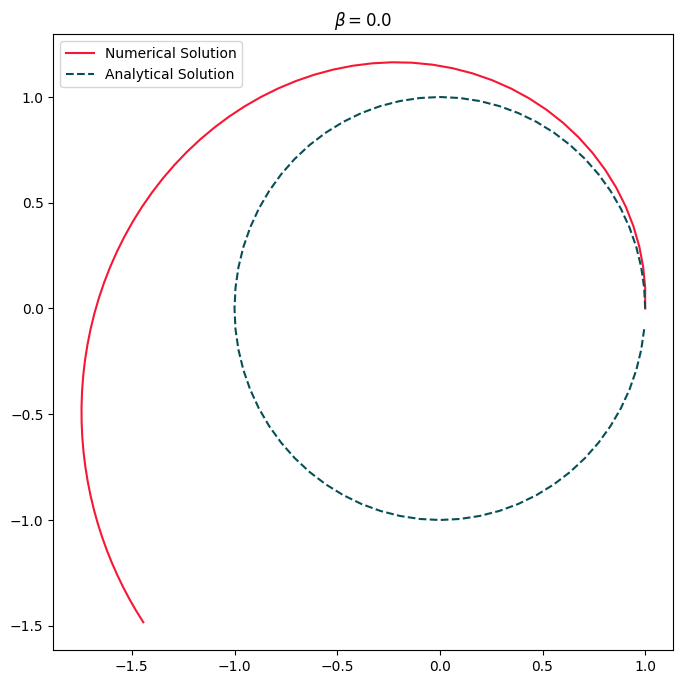

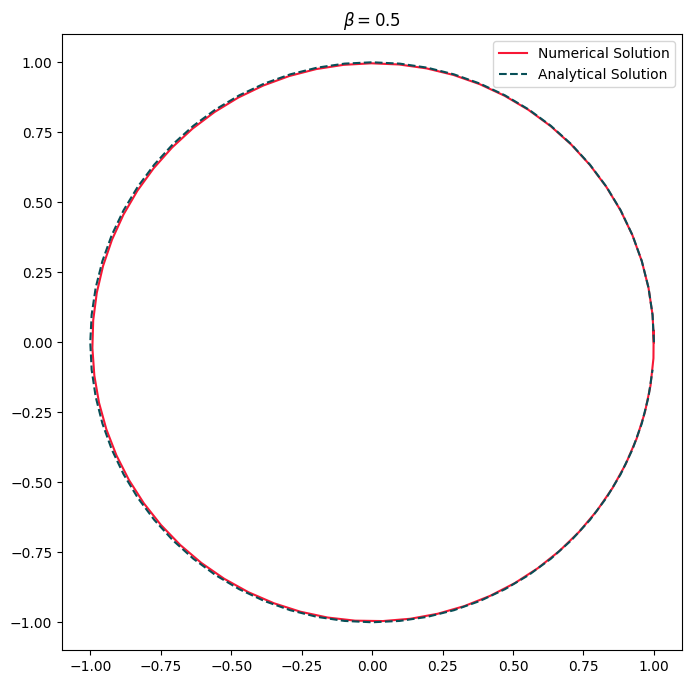

Unsuccessful


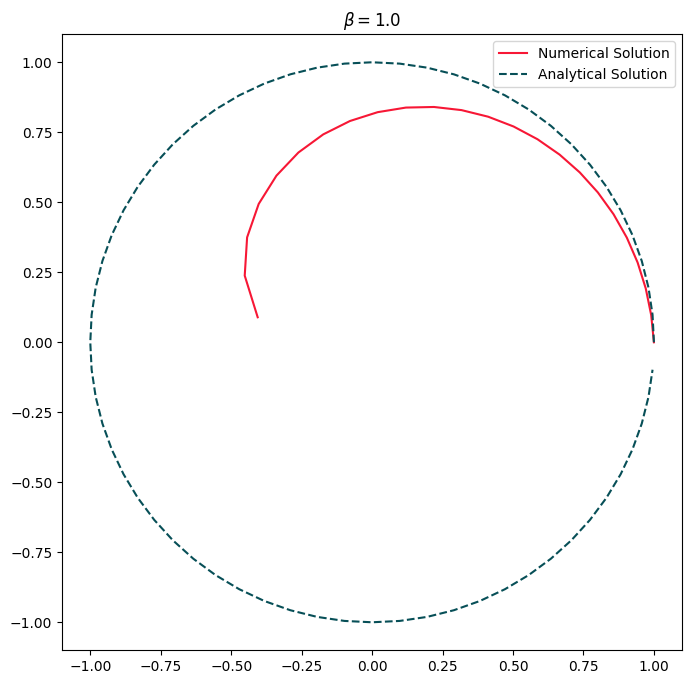

In [ ]:
## Discussion question B.1

# set up all the parameters given in the pdf for the 2 body problem

# then define all the inputs for BetaMethod() and the exact solution function
# handle; use the following syntax to define function handles
#       f = lambda var1, var2, var3: ...
# the code will be considerably more readable

# other parameter needed: beta, h, time range

# finally solve the system using BetaMethod() and plot (x_1(t), x_2(t)) for
# the 3 values of beta in the samee figure together with the exact solution

R = 1
M = 1
G = 4 * np.pi**2
omega = np.sqrt( G*M / R**3 )
period = 2 * np.pi / omega
h = 2**-6 * period
tRange = [0, period]
betas = [0.0, 0.5, 1.0]

f = lambda t, x: np.array([*gravAccF(x[3:], G, M), *x[:3]])
df = lambda t, x: np.block([[np.zeros((3, 3)), gravAccJac(x, G, M) ],
                            [np.eye(3), np.zeros((3, 3))]])

posExact = lambda t: R * np.array([np.cos(omega*t), np.sin(omega*t), 0])
velExact = lambda t: R * np.array([-omega * np.sin(omega*t), omega * np.cos(omega*t), 0])

x0 = posExact(0)
v0 = velExact(0)
vars0 = np.array(np.append(v0,x0))

for beta in betas:

    tArray, solArray = BetaMethod(f, tRange, vars0, df, beta, h)
    nLim = int( ( tRange[1] - tRange[0] ) / h )
    tArrayVals = np.array([tRange[0] + h*n for n in range(nLim)])

    solArray = np.array(solArray)

    xExact = np.array([posExact(t) for t in tArrayVals])
    vExact = np.array([velExact(t) for t in tArrayVals])

    fig = plt.figure(figsize=(8,8))
    plt.plot(solArray[:, 3], solArray[:, 4], label="Numerical Solution", c = '#F71735')
    plt.plot(xExact[:, 0], xExact[:, 1], label="Analytical Solution", linestyle = "dashed", c = '#074F57')

    plt.title(f"$\\beta = {beta}$")
    plt.legend()
    plt.show()


# Discussion question B.1:

From the tutorials we have that the angular momentum monotonically increases for $β=0$, is exactly conserved for $β=\frac{1}{2}$ and monotonically decreases for $β=1$.

We also have shown that $||L(v_{exact}(t),x_{exact}(t)||_2=mωR^2$.

In addition, $ω=\sqrt\frac{GM}{R^3}$.

By substituting this into our previous equation we get:
$||L(v_{exact}(t),x_{exact}(t)||_2=m\sqrt{GMR}$

From the latter equality we have that $m$, $M$ and $G$ are fixed values and so if the angular momentum monotonically increases then $R$ has to monotonically increase; if the angular momentum is exactly conserved then $R$ stays constant as well; and if the angular momentum monotonically decreases then $R$ has to monotonically decrease.

This can behaviour is shown in the plots for the orbits given different values of $β$ above.




---B.2



Unsuccessful
Unsuccessful
Unsuccessful
Unsuccessful


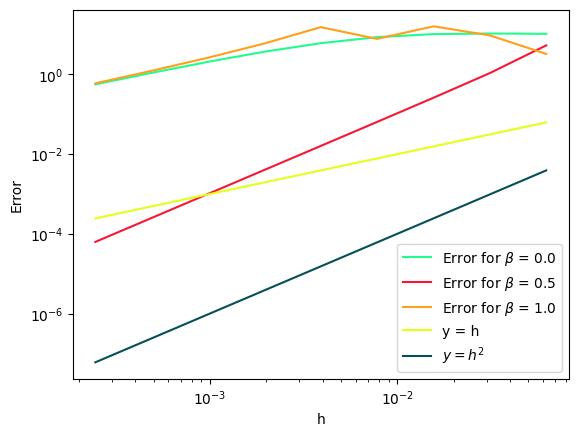

In [ ]:
## Discussion question B.2

# set up the inputs of BetaMethod and initialize the error variable

# solve the system using different values of beta and h and store the error

# IMPORTANT: the output of this cell is a single figure with 6 plots, 3 for the
# error and 3 for the corresponding functions to compare the slopes (for beta
# equal to 0 and 1 they will be the same)

hVals = np.array([2**-l * period for l in range(4,13)])

R = 1
M = 1
G = 4 * np.pi**2
omega = np.sqrt( G*M / R**3 )
period = 2 * np.pi / omega
tRange = [0, period]
betas = [0.0, 0.5, 1.0]
beta = 0.5

f = lambda t, x: np.array([*gravAccF(x[3:], G, M), *x[:3]])
df = lambda t, x: np.block([[np.zeros((3, 3)), gravAccJac(x, G, M) ],
                            [np.eye(3), np.zeros((3, 3))]])

posExact = lambda t: R * np.array([np.cos(omega*t), np.sin(omega*t), 0])
velExact = lambda t: R * np.array([-omega * np.sin(omega*t), omega * np.cos(omega*t), 0])

x0 = posExact(0)
v0 = velExact(0)
vars0 = np.array(np.append(v0,x0))
colours = ['#20FC8F', '#F71735', '#FF9F1C']
m = 0
for beta in betas:

    normErrorPlot =[]
    xAndvExact = []

    for h in hVals:

        tArray, solArray = BetaMethod(f, tRange, vars0, df, beta, h)
        nLim = int( ( tRange[1] - tRange[0] ) / h )
        tArrayVals = np.array([tRange[0] + h*n for n in range(nLim)])

        solArray = np.array(solArray)

        xExact = np.array([posExact(period)])
        vExact = np.array([velExact(period)])
        xAndvExact = np.concatenate((vExact, xExact), axis=1)
        error = abs(xAndvExact - solArray[-1])

        normError = np.linalg.norm(error, 2)
        normErrorPlot.append(normError)
    plt.loglog(hVals, normErrorPlot[:len(hVals)], label = f'Error for $\\beta$ = {beta}', c = colours[m])

    m += 1
plt.loglog(hVals, hVals, label = 'y = h', c = '#E4FF1A')
plt.loglog(hVals, [h**2 for h in hVals], label = '$y = h^2$', c = '#074F57')
plt.ylabel('Error')
plt.xlabel('h')
plt.legend(loc = 'lower right')
plt.show()

# Discussion question B.2:

In this case we can see a similar behaviour as in part A becuase both values of $β=0$ and $β=1$ behave similarly and they have a slope close to the one of $y=h$. On the other hand, $β=\frac{1}{2}$ has a similar slope to $y=h^2$ because its truncation error has a factor of $h$ more with respect to those of the other values of $β$

## **Simulation of the solar system**

In [ ]:
# GIVEN DATA

# once you run this cell, data do not need to be redefined afterwards

# bodyData >>> dictionary
# planet_name : [[position], [velocity], mass, radius]
bodyData = {'Sun':     [[-0.001970535866989,0.006992528613755,0.003003353286460],     [-0.003060516548058,9.766503215911289e-05,1.285769889353954e-04], 1.,                    0.004645788049977    ],
            'Mercury': [[-0.103750564753643,0.265872999389654,0.151845741595397],     [-11.786488212332412,-3.043816938682143,-0.404437018499995],      1.660100000000000e-07, 1.631039257833501e-05],
            'Venus':   [[0.690679248097975,0.216272706068898,0.053342373520349],      [-2.191009617045287,6.362618945084622,3.001392241820023],         2.447838300000000e-06, 4.045512126396863e-05],
            'Earth':   [[-0.390407827983219,-0.851914518842311,-0.369327622703087],   [5.699180080971290,-2.233434088853574,-0.968082733568435],        3.003489596320000e-06, 4.263429666582815e-05],
            'Moon':    [[-0.387769495725030,-0.851521423704295,-0.369414334068375],   [5.665513423756666,-2.044803028185879,-0.889439117880211],        3.694303706838754e-08, 1.161781241850256e-05],
            'Mars':    [[-0.737647142329740,1.319523618250907,0.624881276054329],     [-4.369234120273118,-1.747768808918232,-0.683735132118248],       3.227151000000000e-07, 2.270754245434591e-05],
            'Jupiter': [[-1.083725767182327,-4.774617596156765,-2.020193717119794],   [2.664581611056880,-0.373809177417589,-0.225076986037626],        9.547919399999999e-04, 4.778945025452157e-04],
            'Saturn':  [[2.717966807444090,-8.895476170824110,-3.791336560161174],    [1.849168547433158,0.533174622083356,0.140593650870695],          2.858860000000000e-04, 4.028666966848747e-04],
            'Uranus':  [[16.702835279475660,9.904620456544170,4.101720437757826],     [-0.786425398309071,1.042085220791517,0.467526827197142],         4.366243999999999e-05, 1.708513622580592e-04],
            'Neptune': [[29.091455715025140,-6.237643073996448,-3.277367855295219],   [0.261580139664187,1.040386341187902,0.419323757516277],          5.151389000000000e-05, 1.655504846701003e-04],
            'Pluto':   [[12.326835909722869,-28.796445349285797,-12.700526363474438], [1.093172334249140,0.294046564794999,-0.237609365630783],         7.396000000000000e-09, 7.687275190608712e-06]}

# bodyMass >>> mass array
bodyMass = np.array([planet[2] for planet in bodyData.values()])

# radius
radius = np.array([planet[-1] for planet in bodyData.values()])

# velAndPos >>> each row contains velocity and position components
velAndPos = np.zeros((11,6))
planet_data = bodyData.values()
i = 0
for planet in planet_data:
    velAndPos[i, 0] = planet[1][0]
    velAndPos[i, 1] = planet[1][1]
    velAndPos[i, 2] = planet[1][2]
    velAndPos[i, 3] = planet[0][0]
    velAndPos[i, 4] = planet[0][1]
    velAndPos[i, 5] = planet[0][2]
    i += 1


In [ ]:
# RHS of the N-body problem
# N-body simulation has been non-dimensionalized

# INPUT
# t             current time level
# solVec        current solution vector (size 1 x 6*N)
# mass          array with mass of each body (N x 1)
#
# OUTPUT
# f             right-hand side of the N-body system (1 x 6*N)

def nBodyF(t, solVec, mass):

    # define G

    # reshape the solution vector so that in each row you have the 6 components
    # corresponding to each of the planets (use np.reshape()) and create a
    # variable F with the same shape to store the corresponding rhs

    # fill F looping on the rows using the rhs in the corresponding tutorial
    # part (check carefully the indeces of that sum); reuse your gravAccF

    # before returning, reshape your F to get to the original shape of solVec

    N = len(mass)
    theSum = lambda t, b, p : gravAccF(solVec[b*6+3:b*6 + 6] - solVec[p*6+3:p*6 + 6], G, mass[p])
    newSolVec = np.zeros(N*6)
    for b in range(N):
        newSolVec[6*b:6*b+3] = sum([theSum(t, b, p) for p in range(N) if p != b])
        newSolVec[6*b+3:6*b+6] = solVec[6*b:6*b+3]
    return newSolVec

In [ ]:
# Jacobian matrix of the rhs of the N-body problem
# N-body simulation has been non-dimensionalized

# INPUT
# t             current time level
# solVec        current solution vector (size 1 x (6 * N))
# mass          array with mass of each body (1 x N)
#
# OUTPUT
# jacF          Jacobian matrix of rhs of N-body system (size 6*N x 6*N)

def coFactors(t, b, i, y, mass, G=4*np.pi**2, N=11):
    xPlanets = lambda q, r : y[q*6+3:q*6+6] - y[r*6+3:r*6+6]
    m = lambda p : mass[p]
    if i == b:
        #the terms in the diagonal (like a kronecker delta)
        #all info (sum of the gravitational acc regarding all other planets)
        sumJacobian = np.zeros((3,3))
        for p in range(N):
            if p != b:

                sumJacobian += gravAccJac(xPlanets(b, p), G, m(p))

        return np.block([[np.zeros((3, 3)), sumJacobian],
                         [np.eye(3), np.zeros((3, 3))]])
    else:
        #the terms which are not in the diagonal
        #info about this planet and another
        return np.block([[np.zeros((3, 3)), -1*gravAccJac(xPlanets(b, i), G, m(i))],
                         [np.zeros((3, 3)), np.zeros((3, 3))]])
def nBodyJac(t, solVec, mass):

    # here you have to assemble the jacobian matrix that you previously
    # computed in the tutorial part
    # there's almost no way you can assemble it correctly if you didn't do it
    # pen on paper earlier (at least to some extent)

    # remember to reuse previously computed functions

    # it's extremely easy to screw with the indeces, so feel free to create
    # auxiliary functions that return the correct row and column indeces set
    # for each planet if you need them


    N = len(mass)
    #print(np.block([[smallJacobian(t, b, i, solVec, mass) for i in range(N)] for b in range(N)]))

    jacF = np.block([[coFactors(t, b, i, solVec, mass) for i in range(N)] for b in range(N)])

    return jacF


np.set_printoptions(linewidth=20000)

nBodyJac(0, velAndPos.flatten(), bodyMass)[0:12:,0:12]


array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.68859449e-03,  2.53289174e-03,  2.53289174e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -4.17424305e-04, -6.26136457e-04, -6.26136457e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.53289174e-03,  1.68859449e-03,  2.53289174e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -6.26136457e-04, -4.17424305e-04, -6.26136457e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.53289174e-03,  2.53289174e-03,  1.68859449e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -6.26136457e-04, -6.26136457e-04, -4.17424305e-04],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.0

In [ ]:
x0 = []
for i in range(len(velAndPos)):
    x0.extend(velAndPos[i])
x0 = np.array(x0)

coFactors(10, 3, 3, x0, bodyMass, G=4*np.pi**2, N=11)

array([[  0.        ,   0.        ,   0.        , 229.28008624, 343.92012936, 343.92012936],
       [  0.        ,   0.        ,   0.        , 343.92012936, 229.28008624, 343.92012936],
       [  0.        ,   0.        ,   0.        , 343.92012936, 343.92012936, 229.28008624],
       [  1.        ,   0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   1.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   1.        ,   0.        ,   0.        ,   0.        ]])

In [ ]:
# GIVEN FUNCTION

# Simulation of precomputed orbits of celestial bodies
# INPUT
# tArray        1 x Nt array containing the time points
# solArray      (6 N) x Nt array containing the velocities and positions of N bodies
# bodyData      auxilliary data structure

# ------------------------------------------------------------------------------
# define some auxiliary functions
def rangePos(idx):
    idxRange = np.arange((6 * (idx - 1) + 4), 6 * idx +1)
    return idxRange

def nBodyAngularMomentum(solArray, mass):
    N = len(mass)
    solVec = np.reshape(solArray, (N, 6))
    centerOfMass = np.zeros(3)
    for bdx in range(1, N+1):
        centerOfMass += solVec[bdx-1, 3 : 6]*mass[bdx-1]
    centerOfMass = centerOfMass / np.sum(mass)
    angMom = np.zeros((N,3))
    for bdx in range(1,N+1):
        angMom[bdx-1,:] = mass[bdx-1] * np.cross(solVec[bdx-1, 3:6] - centerOfMass, solVec[bdx-1, 0:3])

    return angMom

# ------------------------------------------------------------------------------

def simulateSolarSystem(tArray, solArray, bodyData):
    N = len(bodyData)
    angularMomInit = np.sum(nBodyAngularMomentum(solArray[0,:], mass), 0)
    direction3 = angularMomInit / np.linalg.norm(angularMomInit)
    direction1 = np.zeros(len(direction3))
    cdx = np.where(direction3 == np.abs(direction3).min())[0][0]
    direction1[cdx] = 1.
    direction1 = direction1 - np.matmul(direction1, direction3) * direction3
    direction1 = direction1 / np.linalg.norm(direction1)
    direction2 = np.cross(direction3, direction1)

    projPos = []
    for bdx in range(1,N+1):
        A = np.matmul(solArray[:, rangePos(bdx)-1],direction1)
        B = np.matmul(solArray[:, rangePos(bdx)-1],direction2)
        projPos.append( np.array([[A][0], [B][0]]) )

    cMap =[[       0,    0.4470,    0.7410],
        [  0.8500,    0.3250,    0.0980],
        [  0.9290,    0.6940,    0.1250],
        [  0.4940,    0.1840,    0.5560],
        [  0.4660,    0.6740,    0.1880],
        [  0.3010,    0.7450,    0.9330],
        [  0.6350,    0.0780,    0.1840],
        [  0.7263,    0.3085,    0.3880],
        [  0.8175,    0.5390,    0.5920],
        [  0.9087,    0.7695,    0.7960],
        [  1.0000,    1.0000,    1.0000]]

    fig = plt.figure(figsize=(17,7.5))
    planetname = list(bodyData.keys())

    for bdx in range(N):
        mrk_size = 20*(radius[bdx] / radius[0])**(1/6)
        plt.plot(projPos[bdx][0,:], projPos[bdx][1,:], color=cMap[bdx], label=planetname[bdx])
        if beta == 1.:
            plt.plot(projPos[bdx][0,-2], projPos[bdx][1,-2], '.', color=cMap[bdx], markersize=mrk_size)
        else:
            plt.plot(projPos[bdx][0,-1], projPos[bdx][1,-1], '.', color=cMap[bdx], markersize=mrk_size)

    ax = plt.gca()
    ax.set_facecolor('k')
    plt.legend(loc='lower right')
    plt.xlim([-6.,6.])
    plt.ylim([-2.5,2.5])
    plt.title('Orbits after 1 year, $\\beta = %3.1f$' % beta, fontsize=16)
    plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)
    plt.show()

    if beta == 1.0:
        print('--------------------------------------------------------------------------------------------------------------------------')
        plt.figure(figsize=(17,7.5))
        for bdx in range(N):
            mrk_size = 20*(radius[bdx] / radius[0])**(1/6)
            plt.plot(projPos[bdx][0,:], projPos[bdx][1,:], color=cMap[bdx], label=planetname[bdx])
            plt.plot(projPos[bdx][0,-2], projPos[bdx][1,-2], '.', color=cMap[bdx], markersize=mrk_size)
        ax = plt.gca()
        ax.set_facecolor('k')
        plt.legend(loc='lower right')
        plt.xlim([-0.25, -0.04])
        plt.ylim([-1.05, -0.95])
        plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)
        plt.title('Earth and Moon orbits after 1 year, $\\beta = %3.1f$' % beta, fontsize=16)
        plt.show()

    print('--------------------------------------------------------------------------------------------------------------------------')

    # Compute and plot angular momentum
    ts = len(tArray) # time steps
    angMomArray = np.zeros( (ts,N) )
    for tdx in range(0,ts):
        value = nBodyAngularMomentum(solArray[tdx, :], mass)
        angMomArray[tdx, :] = np.matmul( direction3, np.transpose(value) )

    angMomArray = np.transpose(angMomArray)
    angMomBdx = [3, 4] # indices of Earth and Moon

    plt.figure(figsize=(17,7.5))
    plt.plot(tArray, angMomArray[angMomBdx[0],:]-angMomArray[angMomBdx[0],0], color=cMap[3])
    plt.plot(tArray, angMomArray[angMomBdx[1],:]-angMomArray[angMomBdx[1],0], color=cMap[4])
    if beta == 1.:
        plt.plot(tArray[-2], angMomArray[angMomBdx[0],-2]-angMomArray[angMomBdx[0],0], '.', color=cMap[3], markersize=mrk_size*2)
        plt.plot(tArray[-2], angMomArray[angMomBdx[1],-2]-angMomArray[angMomBdx[1],0], '.', color=cMap[4], markersize=mrk_size*2)
    else:
        plt.plot(tArray[-1], angMomArray[angMomBdx[0],-1]-angMomArray[angMomBdx[0],0], '.', color=cMap[3], markersize=mrk_size*2)
        plt.plot(tArray[-1], angMomArray[angMomBdx[1],-1]-angMomArray[angMomBdx[1],0], '.', color=cMap[4], markersize=mrk_size*2)
    plt.title('Increase in angular momentum of Earth and Moon', fontsize=16)
    plt.xlim([0.,tArray[-1]+0.01])
    plt.xlabel('$t$')
    plt.ylabel('$L^b_0(t) - L^b_0(0)$')
    plt.show()

    print('--------------------------------------------------------------------------------------------------------------------------')

    angMom = np.sum(angMomArray, axis=0)
    angMomErr = angMom - angMom[0]
    plt.figure(figsize=(17,7.5))
    plt.plot(tArray, angMomErr, 'k-')
    if beta == 1.:
        plt.plot(tArray[-2], angMomErr[-2], 'ok', markersize=10, markerfacecolor='red')
    else:
        plt.plot(tArray[-1], angMomErr[-1], 'ok', markersize=10, markerfacecolor='red')
    plt.xlim([0.,tArray[-1]+0.01])
    plt.xlabel('$t$')
    plt.ylabel('$\\sum^N_{b=1} (L^b_0(t) - L^b_0(0))$')
    plt.title('Error in total angular momentum', fontsize=16)
    plt.show()




In [ ]:
## Discussion question B.3 (a)

# set up time step as stated in the assignment and all the other numerical
# variables

# define the initial guess u0, the rhs f and is jacobian jac using
# nBodyF(t, x, mass) and nBodyJac(t, x, mass)

# finally solve the system and plot using the following command
#       simulateSolarSystem(tArray, solArray, bodyData)


In [ ]:
## Discussion question B.3 (b)

# same as before

In [ ]:
## Discussion question B.3 (c)

# same as before

In [ ]:
## GIVEN FUNCTIONS
# INPUT
# tStar         increase of time relatively to 'startDate' in years (3 years
#               for question B.4(a))
#
# OUTPUT
# date          string displaying absolute time and date

import datetime as dt

def Time2String(tStar):
    startDate = dt.datetime(2019, 5, 27, 9, 0, 0) # datetime(y, m, d, h, m, s)
    convDate = startDate.timestamp()

    eclipseTimeInSeconds = (365.25 * 24 * 3600) * tStar

    addToDate = convDate + eclipseTimeInSeconds
    newDate = dt.datetime.fromtimestamp(addToDate)

    date = newDate.strftime("%c")

    return date


In [ ]:

x0 = []
for i in range(len(velAndPos)):
    print(velAndPos[i])
    #For some reason append or concatenate did not work, so we had to use extend.
x0 = np.array(x0)

[-3.06051655e-03  9.76650322e-05  1.28576989e-04 -1.97053587e-03  6.99252861e-03  3.00335329e-03]
[-11.78648821  -3.04381694  -0.40443702  -0.10375056   0.265873     0.15184574]
[-2.19100962  6.36261895  3.00139224  0.69067925  0.21627271  0.05334237]
[ 5.69918008 -2.23343409 -0.96808273 -0.39040783 -0.85191452 -0.36932762]
[ 5.66551342 -2.04480303 -0.88943912 -0.3877695  -0.85152142 -0.36941433]
[-4.36923412 -1.74776881 -0.68373513 -0.73764714  1.31952362  0.62488128]
[ 2.66458161 -0.37380918 -0.22507699 -1.08372577 -4.7746176  -2.02019372]
[ 1.84916855  0.53317462  0.14059365  2.71796681 -8.89547617 -3.79133656]
[-0.7864254   1.04208522  0.46752683 16.70283528  9.90462046  4.10172044]
[ 0.26158014  1.04038634  0.41932376 29.09145572 -6.23764307 -3.27736786]
[  1.09317233   0.29404656  -0.23760937  12.32683591 -28.79644535 -12.70052636]


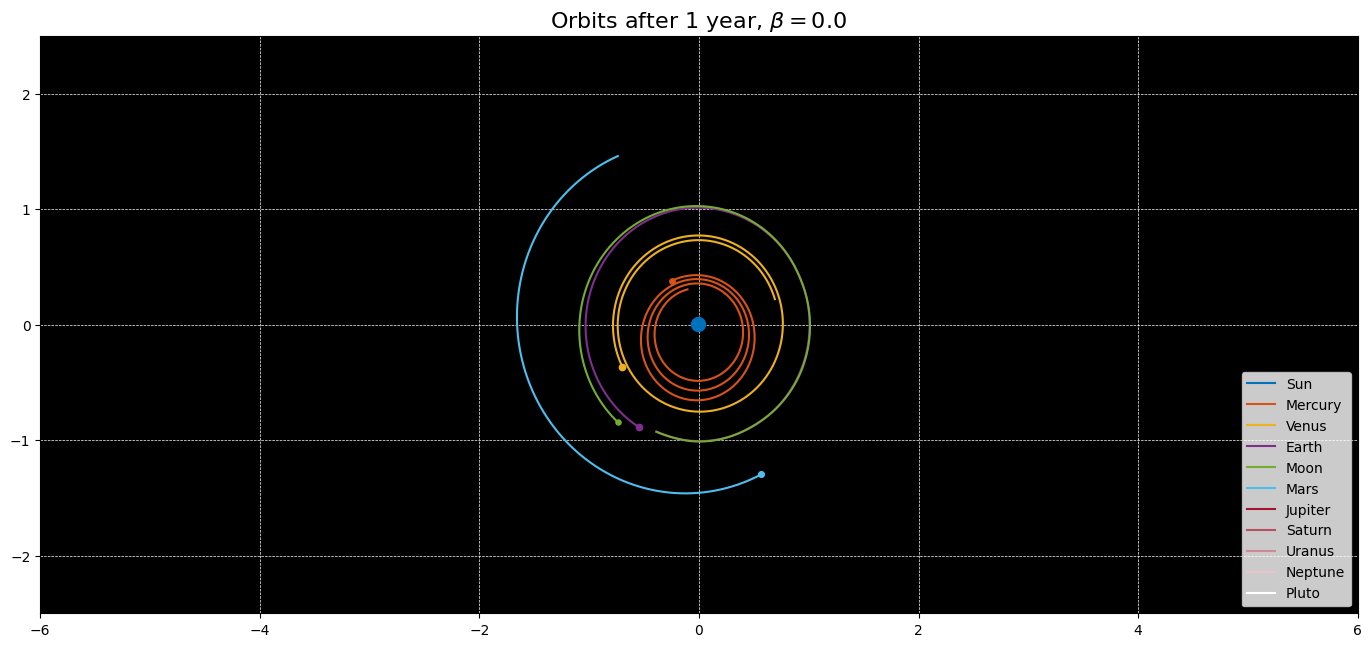

--------------------------------------------------------------------------------------------------------------------------


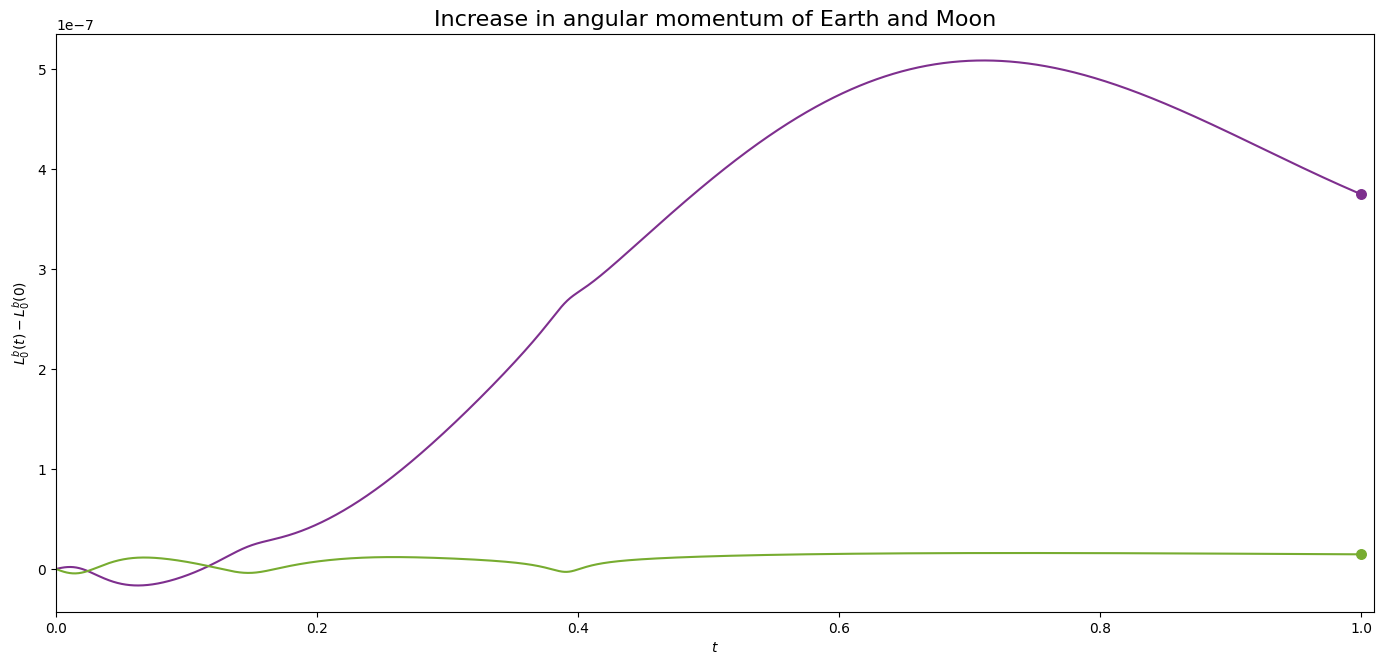

--------------------------------------------------------------------------------------------------------------------------


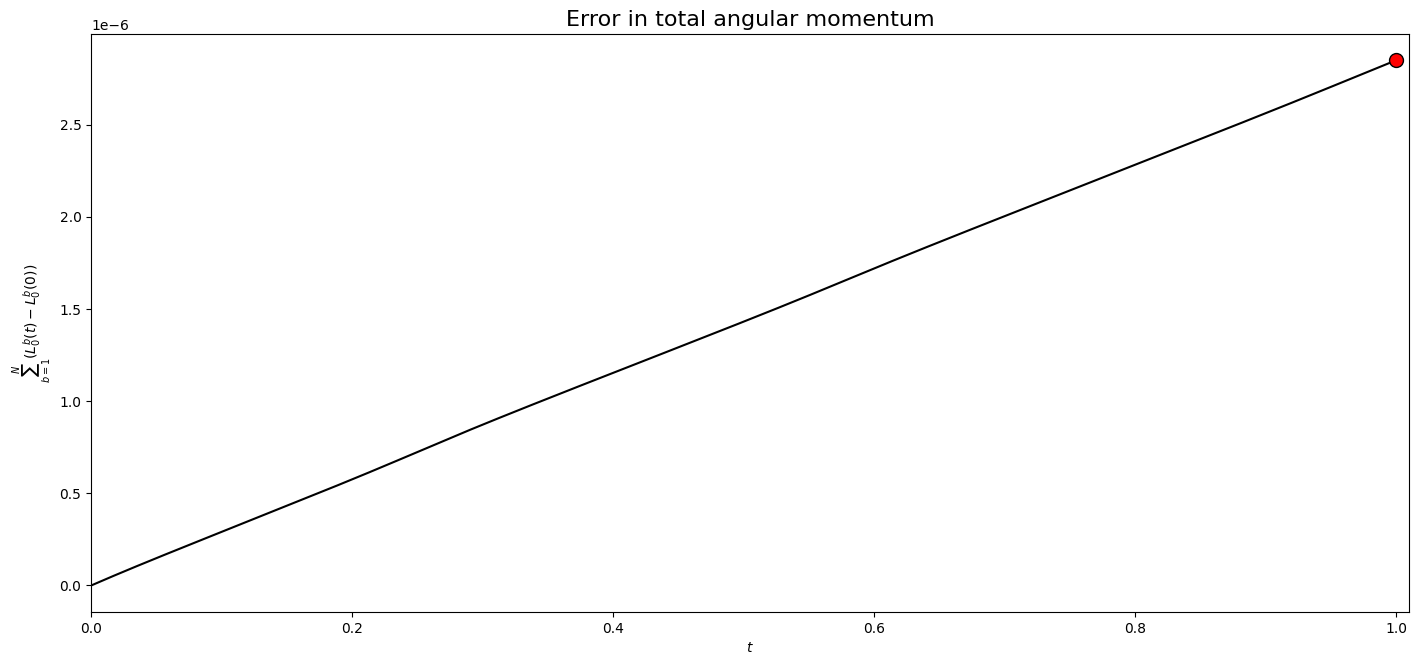

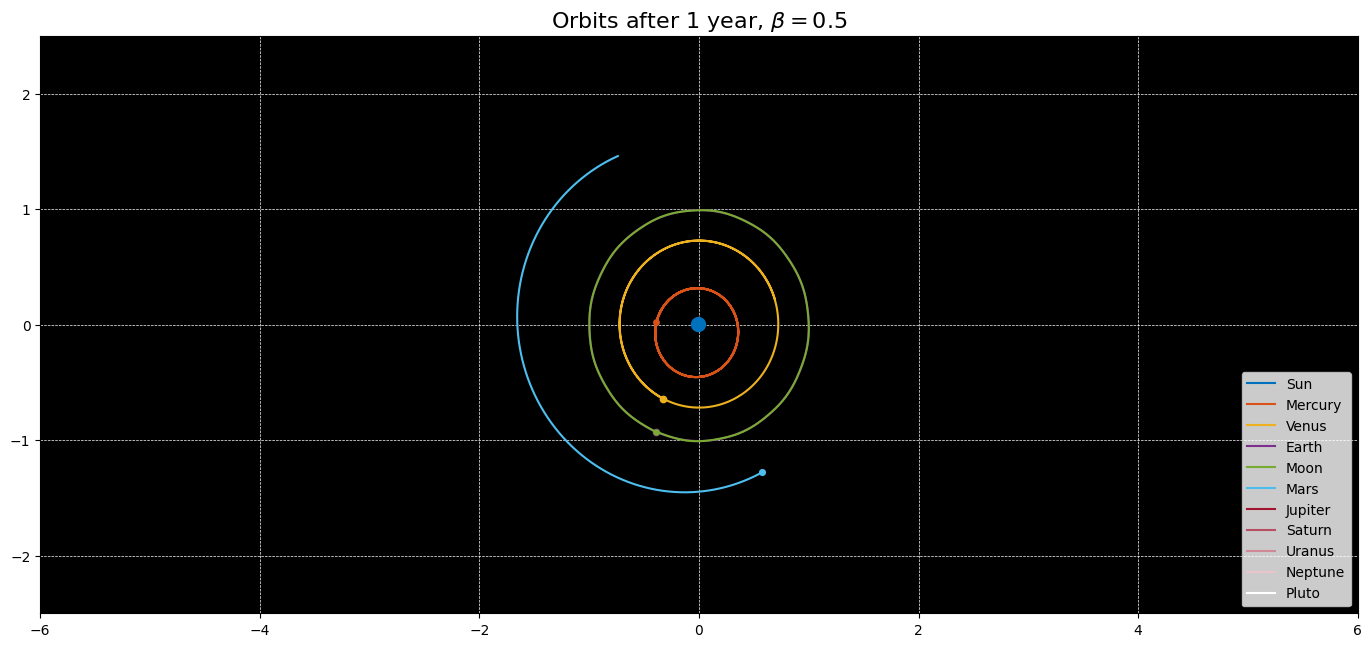

--------------------------------------------------------------------------------------------------------------------------


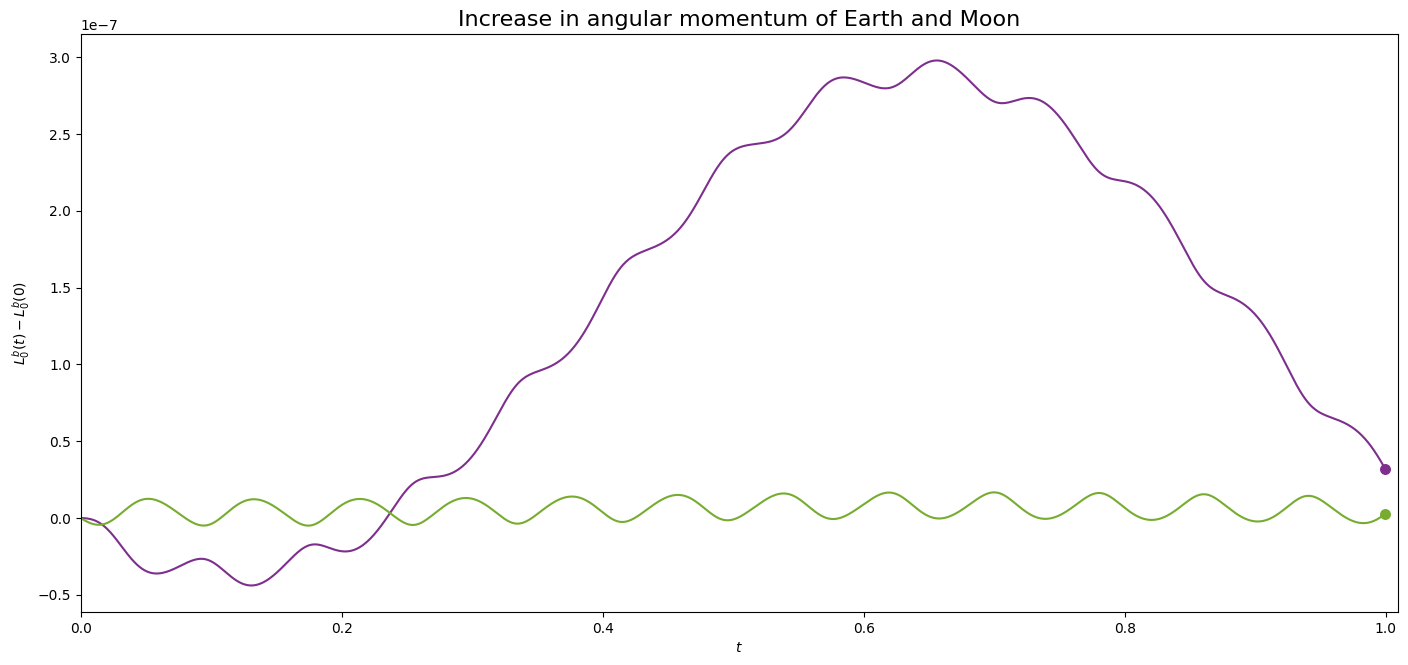

--------------------------------------------------------------------------------------------------------------------------


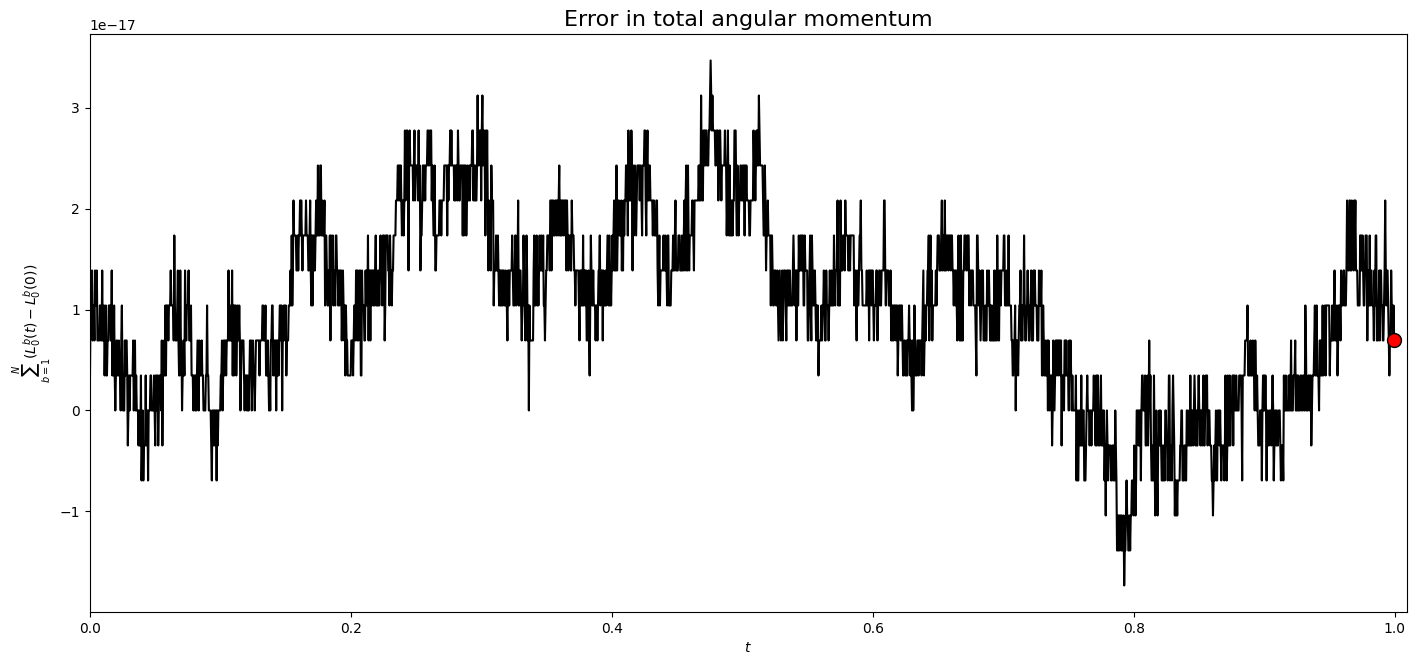

Unsuccessful


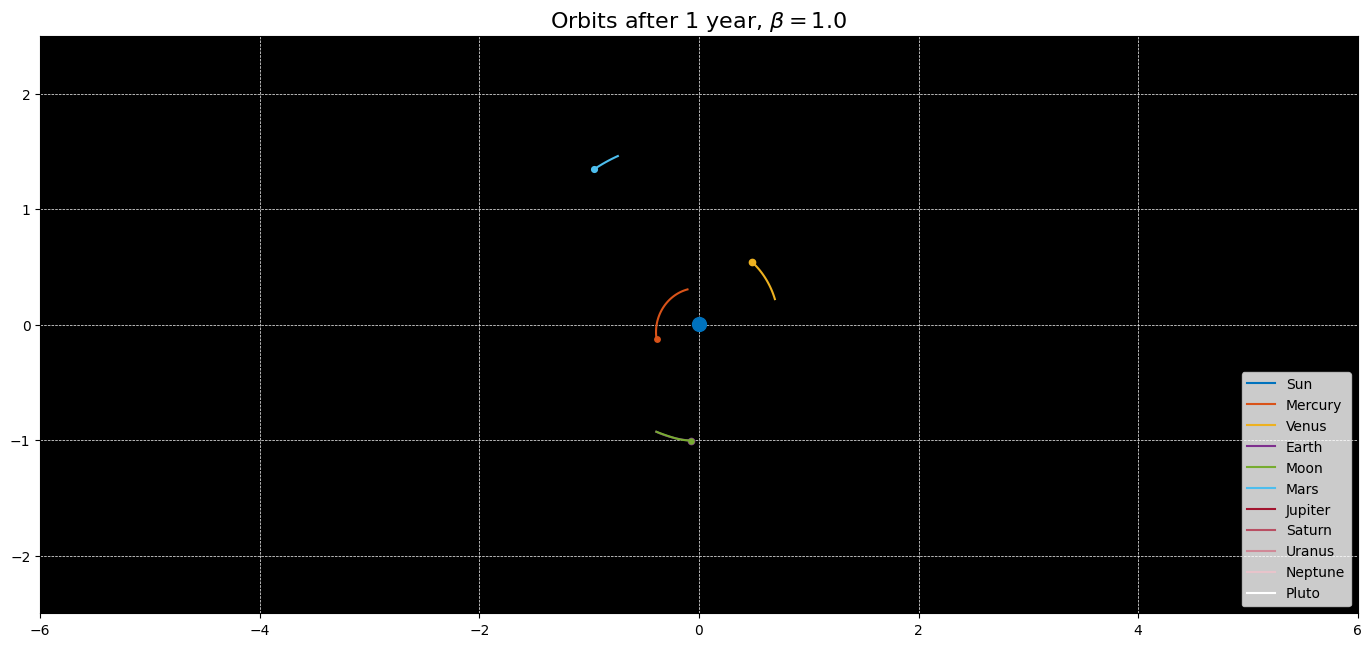

--------------------------------------------------------------------------------------------------------------------------


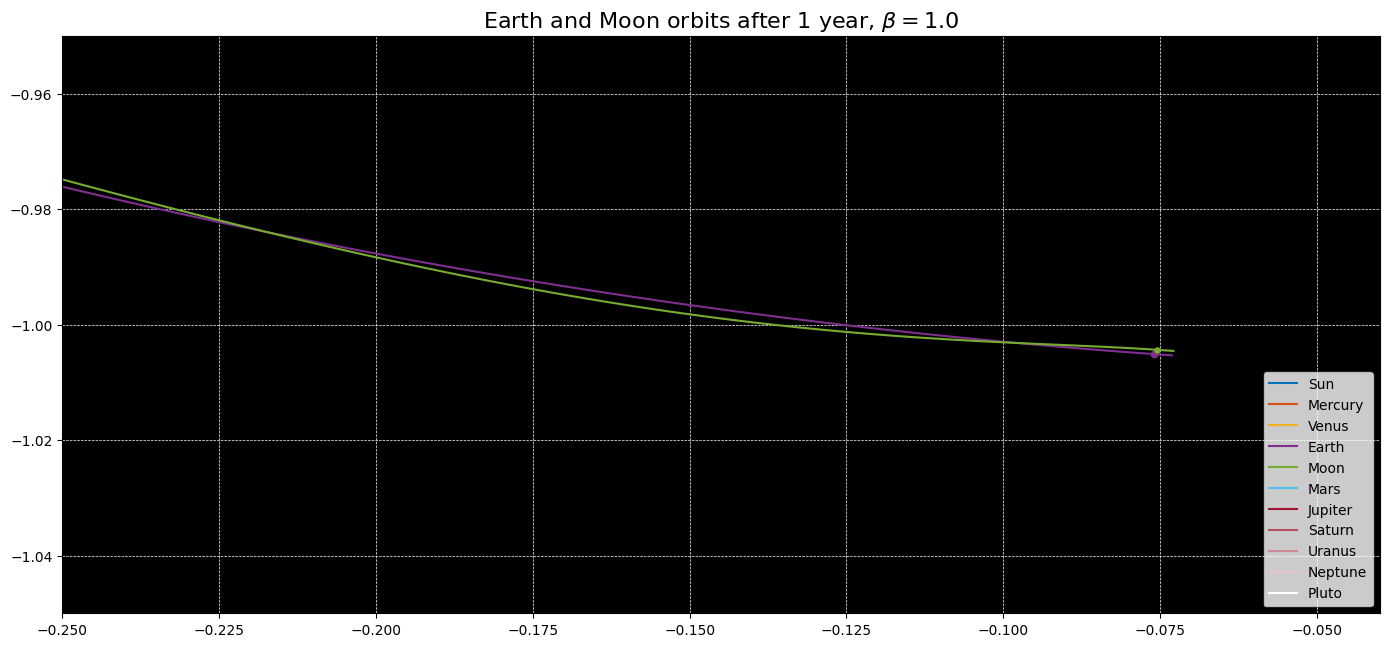

--------------------------------------------------------------------------------------------------------------------------


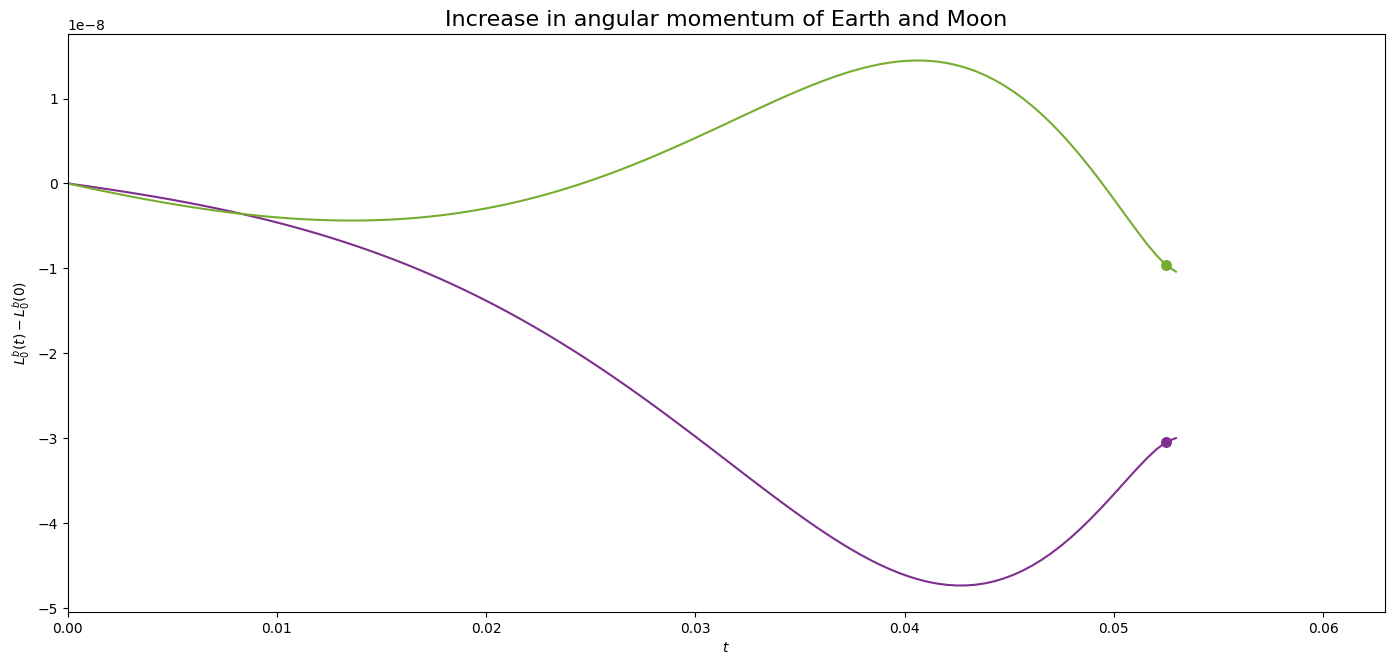

--------------------------------------------------------------------------------------------------------------------------


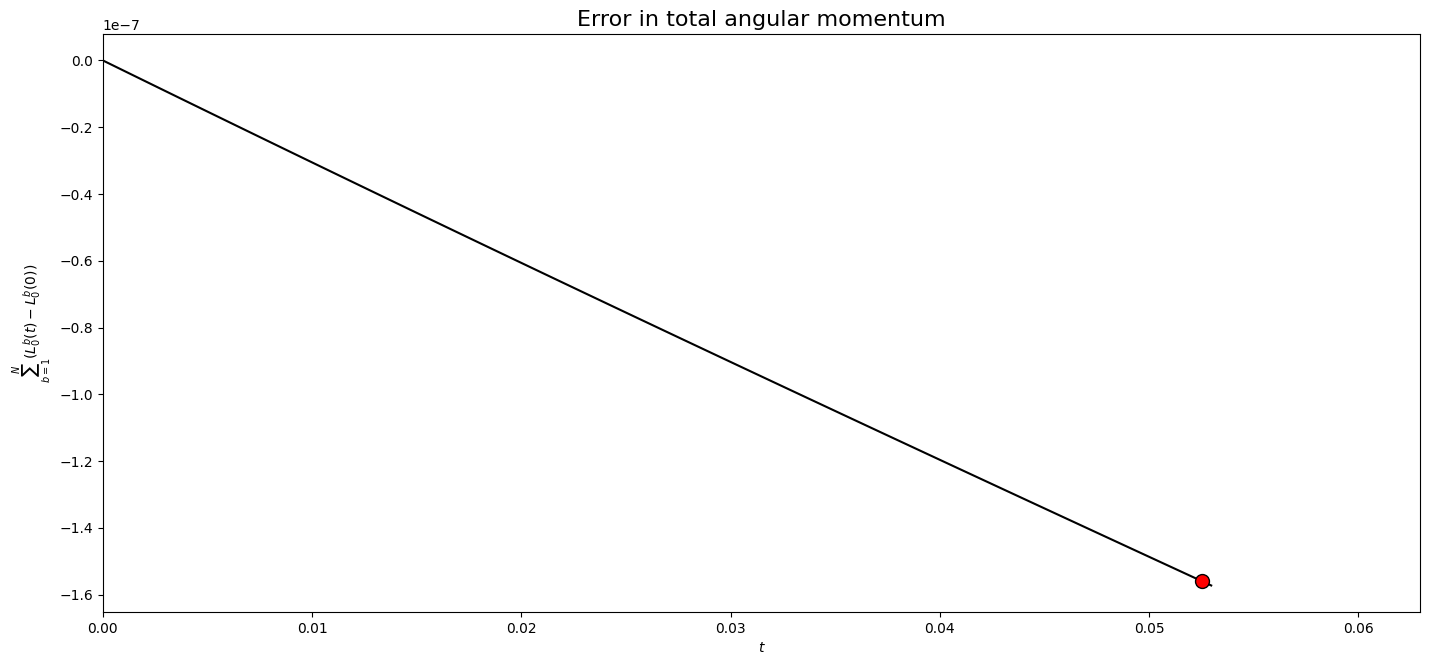

In [ ]:
# R = 1
# M = 1
# G = 4 * np.pi**2
# omega = np.sqrt( G*M / R**3 )
# period = 2 * np.pi / omega
# h = 2**-6 * period
G = 4*np.pi**2
T = 1
h = 0.000456621*T
tRange = [0, T]
betaValues = [0, 0.5, 1]

f = lambda t, x : nBodyF(t, x, bodyMass)
df = lambda t, x : nBodyJac(t, x, bodyMass)

x0 = []
for i in range(len(velAndPos)):
    x0.extend(velAndPos[i])
    #For some reason append or concatenate did not work, so we had to use extend.
x0 = np.array(x0)

for beta in betaValues:
    tValues, xApprox = BetaMethod(f, tRange, x0, df, beta, h)
    mass = bodyMass

    simulateSolarSystem(np.array(tValues), np.array(xApprox), bodyData)

# Discussion question B.3:

a) No, from the plot we can see that the distance between the Earth and the Moon grows larger with time. This could be due to accumulated error and instabilities.

b.1) Yes, the Earth is at the same position after one year.

b.2) The total angular momentum is conserved.

c) The angular momentum of the Moon after diverging, it seems to be converging again to the one of the Earth.

In [ ]:
# Finds nrMax local maxima of y(x)
# INPUT
# xVals         N x 1 array
# yVals         N x 1 array
#
# OUTPUT
# xMax          nrMax x 1 array of the x-values of the local maxima
# yMax          nrMax x 1 array of the local maxima


def findLocalMaxima(xVals, yVals):

    # we suggest to create a boolean vector to save when y_{n-1} < y_n and
    # y_n > y_{n+1}; you can then extract the indeces of the True values using
    #       np.where( boolean_vector )[0]
    # check the documentation of the function online

    # then for these values you can go to the second step
    # - you have to compute a 2nd order lagrange interpolant of the three
    #   points given in the pdf
    # - finally you will find the local maxima computing the derivative of
    #   the polynomial and finding x_star s.t. the derivative is zero and
    #   y_star evaluating the polynomial at x_star

    # you have to return 2 arrays containing the x and y component of all
    # the local maxima

    return xMax, yMax

In [ ]:
## Discussion question B.4

# first you have to solve the n-body problem over a time range of 3 years with
# beta = 0.5 and h = 2 hours using your BeetaMethod function

# from the solution you can extract the position of sun, moon and earth
# and use the definition in tutorial question B.7 to seet up the inputs for
# findLocalMaxima() for both lunar and solar eclipses

# finally you can print out your results in this way
#    print('Predicted solar eclipse at {}'.format(Time2String(some_input)))
#    print('Predicted lunar eclipse at {}'.format(Time2String(some_input)))